# Final Project

# Analysis of factors contributing to house price</span>



* **Name**: Koki Hayashi</span>
* **Student number**: 0400377291</span>

<br>

### Purpose:

* The purpose of this Final Project is to determine the factors that contribute to house price.
* The key **dependent variables**(DV) is house price of unit area, (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
* Key **independent variables** (IVs) include:
  * the transaction date
  * the house age
  * the distance to the nearest MRT station
  * the number of convenience stores in the living circle on foot
  * latitude
  * longitude
* This dataset includes 414 cases (i.e., 414 different real estates), each with 6 features.

### Dataset source:

The data come from the [Real Estate Valuation](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php):

The data are available for download [here](https://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip).

</br>

___
## Introduction

What defines the value of urban real estate? This study shows that property prices are not random but follow clear patterns. By analyzing 414 residential transactions, we examine how infrastructure and neighborhood features influence market value. Using a machine learning method called Support Vector Regression (SVR), we study the relative importance of factors such as distance to the nearest MRT station and the number of nearby stores, creating a framework for understanding and predicting urban property prices.

</br>

___

## Descriptive Statistics

To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

In this section, we provide an overview of the dataset to understand the basic characteristics of the real estate market. We analyze four main variables: housing price, house age, distance from the nearest station, and the number of convenience stores in the vicinity.

First, let us examine the dispersion of these variables. Table 1 summarizes the descriptive statistics, including the standard deviation, range, and interquartile range (IQR).

</br>

In [1]:
%%capture
%run descriptive.ipynb

In [2]:
display_dispersion_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Dispersion summary statistics.</span></p>

,price,age,from station,number of convenience stores
st.dev.,13.59,11.379,1260.584387,2.942
min,7.60,0.000,23.382840,0.000
max,117.50,43.800,6488.021000,10.000
range,109.90,43.800,6464.638160,10.000
25th,27.70,9.025,289.324800,1.000
75th,46.60,28.150,1454.279000,6.000
IQR,18.90,19.125,1164.954200,5.000


From Table 1, we can observe significant variations in the data. For instance, the price per unit (10,000 NTD / Ping) ranges from a minimum of 7.60 to a maximum of 117.50, with a standard deviation of 13.59. The distance from the station also shows a wide distribution, with a maximum value of over 6,400 meters. These values suggest that our dataset contains a diverse range of properties.

Next, we investigate the relationships between the housing price and other factors. Figure 1 displays scatter plots and correlation coefficients ($r$) for each variable against the price.

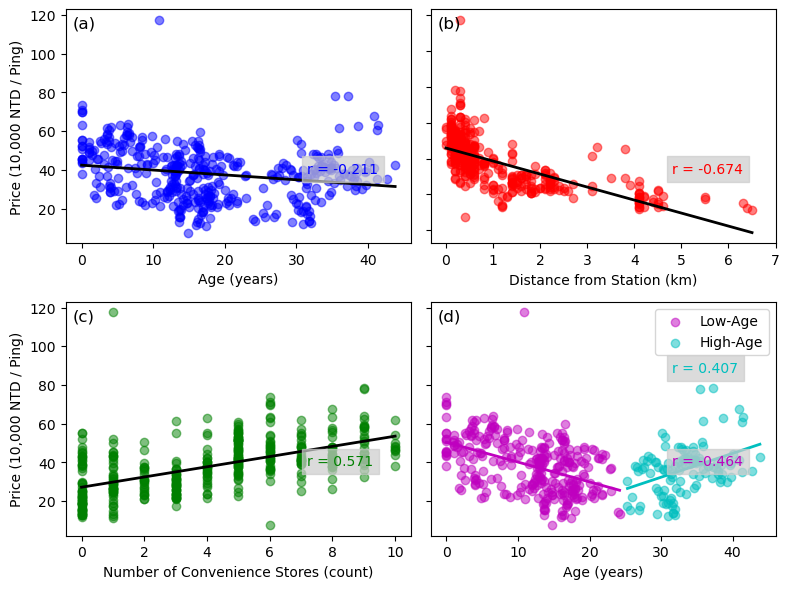

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [3]:
plot_descriptive()

According to Figure 1, we can identify several key trends:
- Graph (a): There is a weak negative correlation ($r = -0.211$) between house age and price. Generally, older houses tend to be cheaper, but the data is widely scattered.
- Graph (b): A strong negative correlation ($r = -0.674$) is observed between the distance from the station and the price. This indicates that properties closer to a station are significantly more expensive.
- Graph (c): There is a moderate positive correlation ($r = 0.571$) with the number of convenience stores. More stores in the neighborhood often correspond to higher property values.
- Graph (d): When we divide the data into "Low-Age" and "High-Age" groups, we see different trends. Interestingly, for older houses (High-Age), the correlation becomes positive ($r = 0.407$), suggesting that other factors might influence the price of vintage properties.

In conclusion, these preliminary analyses show that location (distance from the station) and convenience are major factors affecting housing prices in this dataset.

</br>

___

## Hypothesis Testing: Two-Sample T-test for Station Proximity

Figure 1 suggested that the number of convenience stores may be related to property prices,
but it was still unclear whether the difference between the "High" group (7–10 stores) and the "Medium" group (3–6 stores) was real or just due to chance.

To check this, we performed a simple test comparing the average prices of the two groups.
Specifically, we calculated the average price for properties near 7–10 stores and for those near 3–6 stores,
and checked whether the observed difference could reasonably happen by chance.

In [4]:
import classical as cls

t_high_med, p_high_med = cls.compute_ttest_1()

print(float(t_high_med))
print(float(p_high_med))

4.967395256723803
1.329755471827907e-06


The result shows that the chance of this difference occurring by luck is extremely low (p ≈ 0.0000013),
confirming that properties near 7–10 stores are priced higher than those near 3–6 stores.

Interestingly, this suggests that even in areas that already have many stores, adding more nearby convenience stores still increases property value.
In other words, the demand for convenience has not yet reached its limit, and properties with easier access to more stores continue to be valued higher.

___

This analysis compares the prices of two groups of houses:
- "Old but Convenient" (Age > 20 years, within 500m of a station)
- "New but Inconvenient" (Age < 10 years, more than 1500m from a station)

We performed a simple test to compare the average prices of these two groups, to see whether location or building age has a stronger effect on property value.


In [5]:
t_oldNear_newFar, p_oldNear_newFar = cls.compute_ttest_2()

print(float(t_oldNear_newFar))
print(float(p_oldNear_newFar))

9.402888277034172
2.6257515494450012e-14


The result shows that the difference is extremely unlikely to occur by chance (p ≈ 2.63 × 10⁻¹⁴). The mean price of "Old but Convenient" houses (≈42.35) is much higher than that of "New but Inconvenient" houses (≈28.32).

This indicates that location dominates over building age in determining property prices:
even older properties are more valuable if they are close to a station, while newer properties far from a station are less valued.
<br>

___

## Machine learning: SVM-Regression (SVR)

Subsequently, We focus on a one-feature regression problem to clearly visualize the model behavior and validation results.
An SVR model is fitted to the training data and used to predict house prices over a range of distances from the nearest station.
The plots below show:
- Training data (scatter points)
- Test data (scatter points)
- SVR predicted curve (red line)

By comparing the predicted curve with the actual data points, we can see whether distance from the station has a clear and consistent effect on house prices.

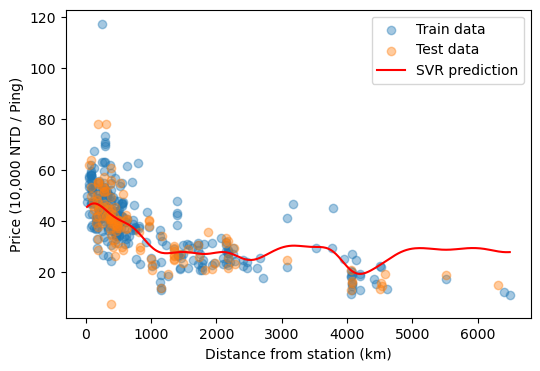

<p><span style="font-size: 1.2em;"><b>Figure 2</b>: SVR prediction of Price and Disance from station.</span></p><br><br>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from improved import svr_model, X_train, X_test, y_train, y_test, predict_svr, gamma_validation

x_plot = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
y_plot = predict_svr(svr_model, x_plot)

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X_test, y_test, alpha=0.4, label="Test data")
plt.plot(x_plot, y_plot, color="red", label="SVR prediction")
plt.xlabel("Distance from station (km)")
plt.ylabel("Price (10,000 NTD / Ping)")
plt.legend()
plt.show()
display_title('SVR prediction of Price and Disance from station.', num=2)

## Validation 

The following plot shows how changing the RBF kernel's `gamma` parameter affects the model's prediction error:
- Blue curve: Average difference between predicted and actual prices over a range of gamma values
- Dotted vertical lines: Selected candidate gamma values for reference

This gamma validation helps us choose a gamma value that gives stable and accurate predictions for the SVR model


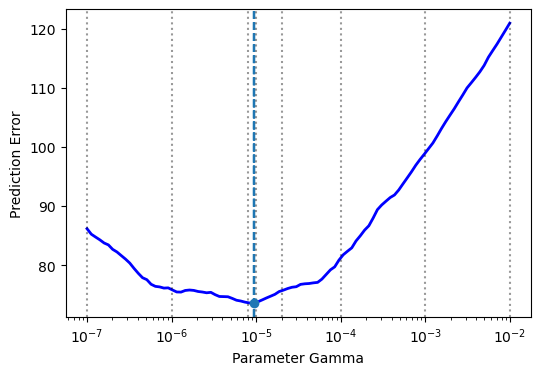

<p><span style="font-size: 1.2em;"><b>Figure 3</b>: Optimization of Model Accuracy through Parameter Gamma Tuning.</span></p><br><br>

In [7]:
gamma_dense, mse_dense, gamma_points, best_gamma, best_mse = gamma_validation(X_train, y_train, X_test, y_test, n_iter=50)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gamma_dense, mse_dense, lw=2, color="blue")
ax.scatter(best_gamma, best_mse, zorder=5)
for g in gamma_points:
    ax.axvline(g, linestyle='dotted', color='k', alpha=0.4)
    ax.axvline(best_gamma, linestyle='--', alpha=0.8)

ax.set_xscale("log")
ax.set_xlabel("Parameter Gamma")
ax.set_ylabel("Prediction Error")
plt.show()
display_title('Optimization of Model Accuracy through Parameter Gamma Tuning.', num=3)

- Very small gamma values result in large differences between predicted and actual prices, meaning the model is too simple to capture the general trend.
- Very large gamma values also lead to larger differences, meaning the model is too sensitive to the data.
- Intermediate gamma values produce the smallest differences, indicating the model captures the overall trend best.

This plot shows why the selected gamma value gives stable and accurate predictions for the SVR model on this dataset.

___

## Overview

In conclusion, this study demonstrates three main findings about property prices. First, proximity to the train station is the most important factor: houses closer to a station consistently command higher prices, while distance lowers value. Second, neighborhood convenience, measured by the number of nearby stores, adds value: even in areas that already have several stores, additional stores further increase property prices. Third, location outweighs building age: older properties in prime locations are more valuable than newer properties in less convenient areas.

These insights are supported by statistical tests: the price difference between areas with high versus medium convenience store counts is highly significant (p ≈ 1.33 × 10⁻⁶), and the difference between “Old but Convenient” and “New but Inconvenient” houses is even more significant (p ≈ 2.63 × 10⁻¹⁴), with average prices of ~42.35 and ~28.32, respectively.

Overall, accessibility and neighborhood convenience are the primary drivers of housing prices, more so than building age. For future research, it would be valuable to examine how these patterns evolve over time, such as during economic downturns, or to compare different cities to test whether these factors hold universally.